In [1]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(0, '../src/')

In [4]:
from logger import LogData, TemporalLogger, EnvLogger

In [5]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log")
log_att_dir = join(dirname(dirname(abspath(__file__))), "log_feat_test")

In [9]:
el = EnvLogger("PongNoFrameskip-v0", log_dir, 250)

In [10]:
el.params_df#.loc[el.params_df.timestamp == '2019-07-20 10_21_45']

,attention_target,attention_type,cntr,end_val,entropy_coeff,env_name,icm_beta,init_val,max_grad_norm,n_stack,num_envs,num_updates,reward_type,rollout_size,tau,threshold,timestamp,value,value_coeff
0,AttentionTarget.NONE,AttentionType.SINGLE_ATTENTION,2500000,0.0,0.02,PongNoFrameskip-v0,0.2,0.02,0.5,4,4,2500000,RewardType.INTRINSIC_AND_EXTRINSIC,5,0.000001,0.00001,2019-07-20 10_21_45,0.0,0.5
1,AttentionTarget.ICM,AttentionType.SINGLE_ATTENTION,2500000,0.0,0.02,PongNoFrameskip-v0,0.2,0.02,0.5,4,4,2500000,RewardType.INTRINSIC_AND_EXTRINSIC,5,0.000001,0.00001,2019-07-22 15_01_57,0.0,0.5
2,AttentionTarget.ICM,AttentionType.DOUBLE_ATTENTION,2500000,0.0,0.02,PongNoFrameskip-v0,0.2,0.02,0.5,4,4,2500000,RewardType.INTRINSIC_AND_EXTRINSIC,5,0.000001,0.00001,2019-07-24 20_34_46,0.0,0.5
3,AttentionTarget.NONE,AttentionType.SINGLE_ATTENTION,2500000,0.0,0.02,PongNoFrameskip-v0,0.2,0.02,0.5,4,4,2500000,RewardType.INTRINSIC_AND_EXTRINSIC,5,50000.000000,0.00001,2019-08-03 19_55_20,0.0,0.5
4,AttentionTarget.ICM,AttentionType.SINGLE_ATTENTION,2500000,0.0,0.02,PongNoFrameskip-v0,0.2,0.02,0.5,4,4,2500000,RewardType.INTRINSIC_AND_EXTRINSIC,5,50000.000000,0.00001,2019-08-06 10_26_43,0.0,0.5
5,AttentionTarget.ICM,AttentionType.DOUBLE_ATTENTION,2500000,0.0,0.02,PongNoFrameskip-v0,0.2,0.02,0.5,4,4,2500000,RewardType.INTRINSIC_AND_EXTRINSIC,5,50000.000000,0.00001,2019-08-09 01_39_43,0.0,0.5
6,AttentionTarget.A2C,AttentionType.SINGLE_ATTENTION,2500000,0.0,0.02,PongNoFrameskip-v0,0.2,0.02,0.5,4,4,2500000,RewardType.INTRINSIC_AND_EXTRINSIC,5,50000.000000,0.00001,2019-08-11 18_59_01,0.0,0.5


       attention_target                  attention_type     cntr  end_val  \
0  AttentionTarget.NONE  AttentionType.SINGLE_ATTENTION  2500000      0.0   

   entropy_coeff            env_name  icm_beta  init_val  max_grad_norm  \
0           0.02  PongNoFrameskip-v0       0.2      0.02            0.5   

   n_stack  num_envs  num_updates                         reward_type  \
0        4         4      2500000  RewardType.INTRINSIC_AND_EXTRINSIC   

   rollout_size       tau  threshold            timestamp  value  value_coeff  
0             5  0.000001    0.00001  2019-07-20 10_21_45    0.0          0.5  
2019-07-20 10_21_45


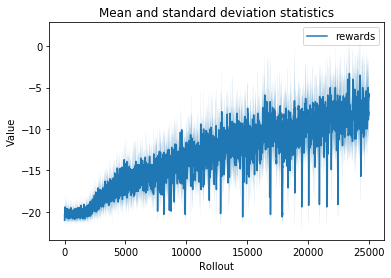

      attention_target                  attention_type     cntr  end_val  \
1  AttentionTarget.ICM  AttentionType.SINGLE_ATTENTION  2500000      0.0   

   entropy_coeff            env_name  icm_beta  init_val  max_grad_norm  \
1           0.02  PongNoFrameskip-v0       0.2      0.02            0.5   

   n_stack  num_envs  num_updates                         reward_type  \
1        4         4      2500000  RewardType.INTRINSIC_AND_EXTRINSIC   

   rollout_size       tau  threshold            timestamp  value  value_coeff  
1             5  0.000001    0.00001  2019-07-22 15_01_57    0.0          0.5  
2019-07-22 15_01_57


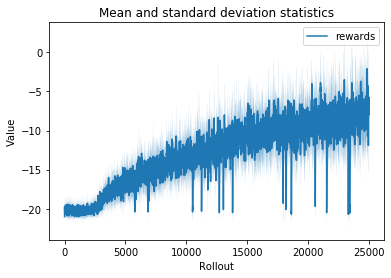

      attention_target                  attention_type     cntr  end_val  \
2  AttentionTarget.ICM  AttentionType.DOUBLE_ATTENTION  2500000      0.0   

   entropy_coeff            env_name  icm_beta  init_val  max_grad_norm  \
2           0.02  PongNoFrameskip-v0       0.2      0.02            0.5   

   n_stack  num_envs  num_updates                         reward_type  \
2        4         4      2500000  RewardType.INTRINSIC_AND_EXTRINSIC   

   rollout_size       tau  threshold            timestamp  value  value_coeff  
2             5  0.000001    0.00001  2019-07-24 20_34_46    0.0          0.5  
2019-07-24 20_34_46


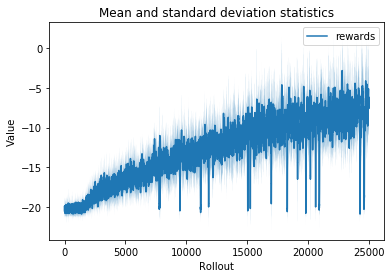

       attention_target                  attention_type     cntr  end_val  \
3  AttentionTarget.NONE  AttentionType.SINGLE_ATTENTION  2500000      0.0   

   entropy_coeff            env_name  icm_beta  init_val  max_grad_norm  \
3           0.02  PongNoFrameskip-v0       0.2      0.02            0.5   

   n_stack  num_envs  num_updates                         reward_type  \
3        4         4      2500000  RewardType.INTRINSIC_AND_EXTRINSIC   

   rollout_size      tau  threshold            timestamp  value  value_coeff  
3             5  50000.0    0.00001  2019-08-03 19_55_20    0.0          0.5  
2019-08-03 19_55_20


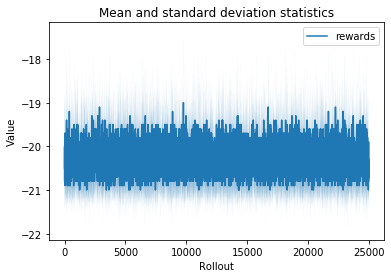

      attention_target                  attention_type     cntr  end_val  \
4  AttentionTarget.ICM  AttentionType.SINGLE_ATTENTION  2500000      0.0   

   entropy_coeff            env_name  icm_beta  init_val  max_grad_norm  \
4           0.02  PongNoFrameskip-v0       0.2      0.02            0.5   

   n_stack  num_envs  num_updates                         reward_type  \
4        4         4      2500000  RewardType.INTRINSIC_AND_EXTRINSIC   

   rollout_size      tau  threshold            timestamp  value  value_coeff  
4             5  50000.0    0.00001  2019-08-06 10_26_43    0.0          0.5  
2019-08-06 10_26_43


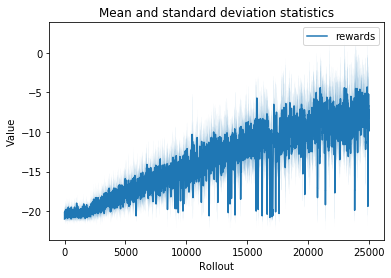

      attention_target                  attention_type     cntr  end_val  \
5  AttentionTarget.ICM  AttentionType.DOUBLE_ATTENTION  2500000      0.0   

   entropy_coeff            env_name  icm_beta  init_val  max_grad_norm  \
5           0.02  PongNoFrameskip-v0       0.2      0.02            0.5   

   n_stack  num_envs  num_updates                         reward_type  \
5        4         4      2500000  RewardType.INTRINSIC_AND_EXTRINSIC   

   rollout_size      tau  threshold            timestamp  value  value_coeff  
5             5  50000.0    0.00001  2019-08-09 01_39_43    0.0          0.5  
2019-08-09 01_39_43


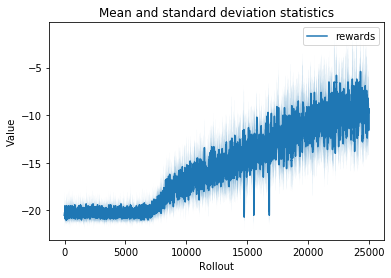

No handles with labels found to put in legend.


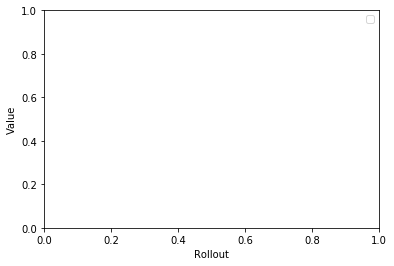

In [9]:
el.plot_mean_std(*["rewards"])

2019-07-20 10_21_45


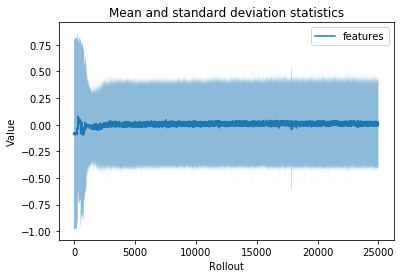

2019-07-22 15_01_57


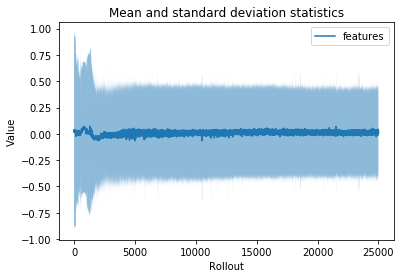

2019-07-24 20_34_46


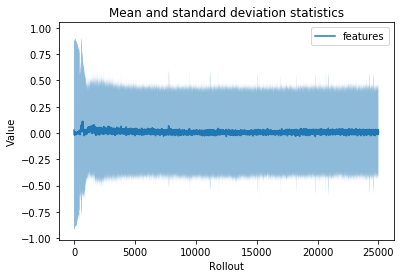

2019-08-03 19_55_20


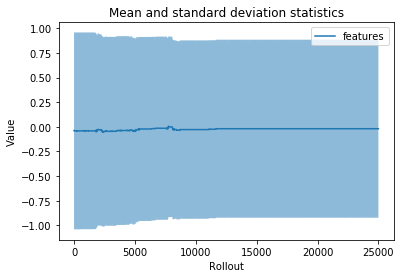

2019-08-06 10_26_43


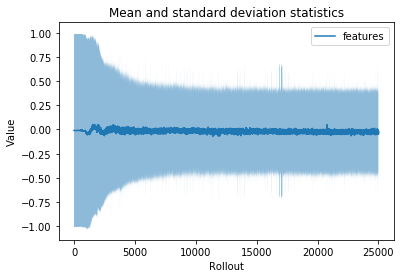

2019-08-09 01_39_43


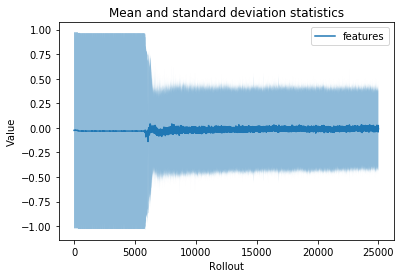

No handles with labels found to put in legend.


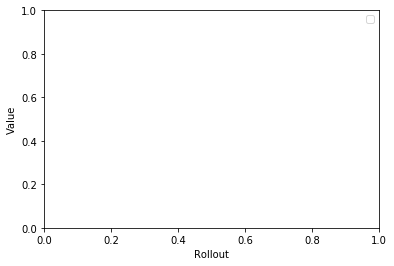

In [8]:
el.plot_mean_std(*["features"])

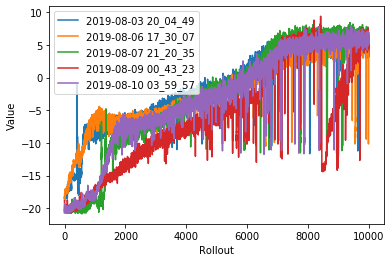

In [8]:
el.plot_proxy()